In [5]:
import numpy as np

In [2]:
from prospect.io import read_results as reader
hfile = "../data/at2018bsi-host-fit.h5"
out, out_obs, out_model = reader.results_from(hfile)

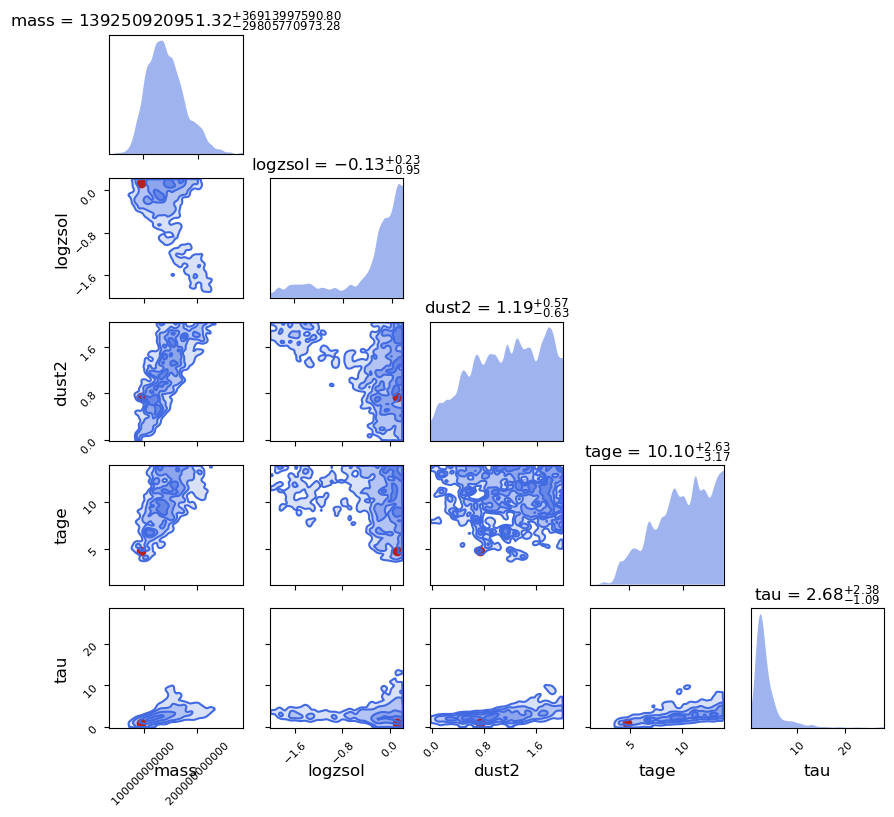

In [3]:
import matplotlib.pyplot as pl
from prospect.plotting import corner
nsamples, ndim = out["chain"].shape
cfig, axes = pl.subplots(ndim, ndim, figsize=(10,9))
axes = corner.allcorner(out["chain"].T, out["theta_labels"], axes, 
                        weights=out["weights"], color="royalblue", show_titles=True)

from prospect.plotting.utils import best_sample
pbest = best_sample(out)
corner.scatter(pbest[:, None], axes, color="firebrick", marker="o")

In [22]:
out["theta_labels"]

['mass', 'logzsol', 'dust2', 'tage', 'tau']

In [21]:
pbest

array([9.49160940e+10, 1.27034635e-01, 7.40865597e-01, 4.74159537e+00,
       9.05478909e-01])

[1.12640677e-07 3.66992197e-07 7.02103007e-07 9.98163268e-07
 1.28674162e-06]


Text(0, 0.5, '$\\chi_{\\rm best}$')

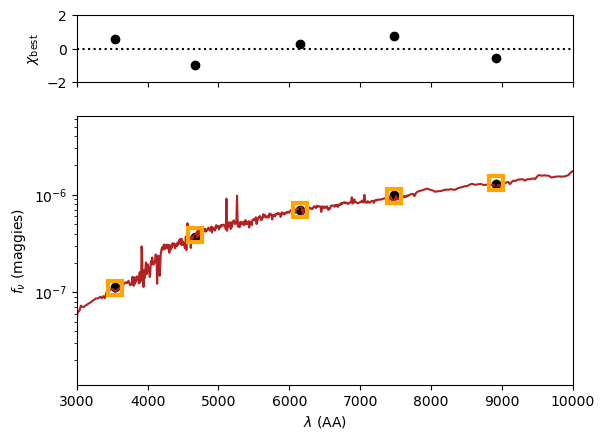

In [74]:
import matplotlib.pyplot as pl
sfig, saxes = pl.subplots(2, 1, gridspec_kw=dict(height_ratios=[1, 4]), sharex=True)
ax = saxes[1]
pwave = np.array([f.wave_effective for f in out_obs["filters"]])
# plot the data
ax.plot(pwave, out_obs["maggies"], linestyle="", marker="o", color="k")
ax.errorbar(pwave,  out_obs["maggies"], out_obs["maggies_unc"], linestyle="", color="k", zorder=10)
ax.set_ylabel(r"$f_\nu$ (maggies)")
ax.set_xlabel(r"$\lambda$ (AA)")
ax.set_xlim(3e3, 1e4)
ax.set_ylim(out_obs["maggies"].min() * 0.1, out_obs["maggies"].max() * 5)
ax.set_yscale("log")

# get the best-fit SED
bsed = out["bestfit"]
ax.plot(bsed["restframe_wavelengths"] * (1+out_obs["redshift"]), bsed["spectrum"], color="firebrick", label="MAP sample")
ax.plot(pwave, bsed["photometry"], linestyle="", marker="s", markersize=10, mec="orange", mew=3, mfc="none")

ax = saxes[0]
chi = (out_obs["maggies"] - bsed["photometry"]) / out_obs["maggies_unc"]
print(out_obs["maggies"])
ax.plot(pwave, chi, linestyle="", marker="o", color="k")
ax.axhline(0, color="k", linestyle=":")
ax.set_ylim(-2, 2)
ax.set_ylabel(r"$\chi_{\rm best}$")

In [7]:
from astropy.io import fits
from astropy.table import Table

file = '../data/spec-at2018bsi-host-sdss.fits'
t_spec = Table.read(file, hdu=1)
t_phot = Table.read(file, hdu=2)

In [30]:
sdss_filters = {'u': 3543,
                'g': 4770,
                'r': 6231,
                'i': 7625,
                'z': 9134
               }

In [60]:
def mag2flux_sdss(mag):
    return 10**((22.5-mag)/2.5)

def fnu_to_flambda(flux, wave):
    c = 2.998e10
    return (wave*wave/c)*flux

[1.12640677e-07 3.66992197e-07 7.02103007e-07 9.98163268e-07
 1.28674162e-06]


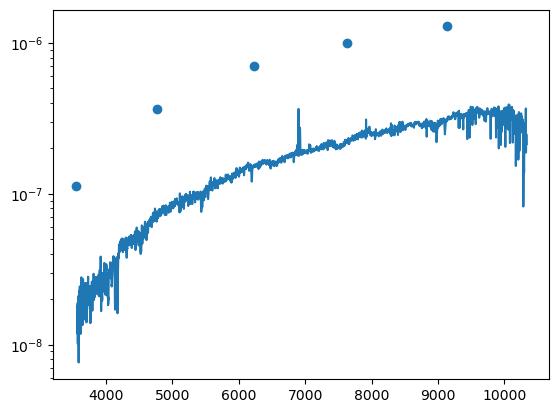

In [81]:
mags = t_phot['CMODELMAG'].value[0]
maggies = np.array([10**(-0.4 * m) for m in mags])
#plt.scatter(sdss_filters.values(), maggies)
print(maggies)
plt.scatter(sdss_filters.values(), maggies)


wave = 10**t_spec['loglam'].value
flux = fnu_to_flambda(t_spec['flux'].value*1e17, wave)
plt.plot(wave, 3.631*flux/1e23)
plt.yscale('log')

In [88]:
pwave

array([3546.00063828, 4669.59393552, 6155.68605117, 7471.57138923,
       8917.3987151 ])

In [89]:
np.array(list(sdss_filters.values()))

array([3543, 4770, 6231, 7625, 9134])

[1.12640677e-07 3.66992197e-07 7.02103007e-07 9.98163268e-07
 1.28674162e-06]


Text(0, 0.5, '$\\chi_{\\rm best}$')

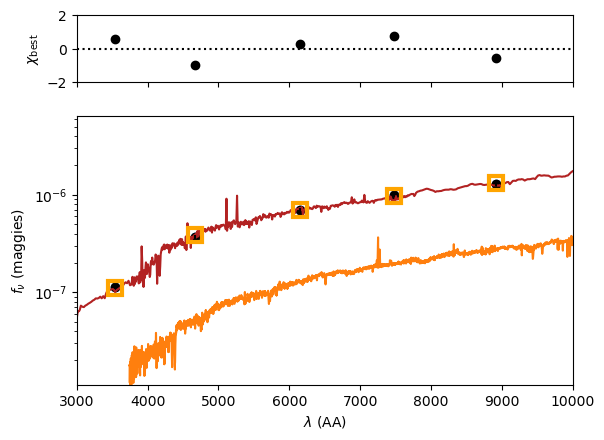

In [90]:
sfig, saxes = pl.subplots(2, 1, gridspec_kw=dict(height_ratios=[1, 4]), sharex=True)
ax = saxes[1]
pwave = np.array([f.wave_effective for f in out_obs["filters"]])
# plot the data
ax.plot(pwave, out_obs["maggies"], linestyle="", marker="o", color="k")
ax.errorbar(pwave,  out_obs["maggies"], out_obs["maggies_unc"], linestyle="", color="k", zorder=10)
ax.set_ylabel(r"$f_\nu$ (maggies)")
ax.set_xlabel(r"$\lambda$ (AA)")
ax.set_xlim(3e3, 1e4)
ax.set_ylim(out_obs["maggies"].min() * 0.1, out_obs["maggies"].max() * 5)
ax.set_yscale("log")

# get the best-fit SED
bsed = out["bestfit"]
ax.plot(bsed["restframe_wavelengths"] * (1+out_obs["redshift"]), bsed["spectrum"], color="firebrick", label="MAP sample")
ax.plot(pwave, bsed["photometry"], linestyle="", marker="s", markersize=10, mec="orange", mew=3, mfc="none")

ax.scatter(pwave, maggies)


wave = 10**t_spec['loglam'].value
flux = fnu_to_flambda(t_spec['flux'].value*1e17, wave)
ax.plot(wave* (1+out_obs["redshift"]), 3.631*flux/1e23)

ax = saxes[0]
chi = (out_obs["maggies"] - bsed["photometry"]) / out_obs["maggies_unc"]
print(out_obs["maggies"])
ax.plot(pwave, chi, linestyle="", marker="o", color="k")
ax.axhline(0, color="k", linestyle=":")
ax.set_ylim(-2, 2)
ax.set_ylabel(r"$\chi_{\rm best}$")


In [56]:
flux

11.579388
11.672122
11.764823
9.968305
7.9081964
7.6717715
8.774834
9.796442
10.342739
10.717923
11.283292


In [ ]:
plt.plot()

In [17]:
d = fits.open(file)

d[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
FLAVOR  = 'science '           / exposure type, SDSS spectro style              
BOSSVER = 'branch_jme-rewrite+svn105958' / ICC version                          
MJD     =                55186 / APO MJD day at start of exposure               
MJDLIST = '55183 55185 55186'  /                                                
RA      =           124.265077 / RA of telescope boresight (deg)                
DEC     =            46.730274 / Dec of telescope boresight (deg)               
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '        

In [16]:
t_spec

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
11.579388,3.5518,0.06664483,0,205520896,1.3881465,11.032989,11.970299
11.672122,3.5519,0.0,0,205520896,1.3913608,10.034883,11.882823
11.764823,3.552,0.17657176,0,67108864,1.391772,10.03673,11.822939
9.968305,3.5521,0.19721588,0,67108864,1.3906612,9.644577,11.720858
7.9081964,3.5522,0.21488994,0,67108864,1.3904653,9.213051,11.68229
7.6717715,3.5523,0.23644818,0,67108864,1.3910186,9.066986,11.749537
8.774834,3.5524,0.24325718,0,0,1.3898807,8.71358,11.914837
9.796442,3.5525,0.23826803,0,0,1.3894504,8.80366,12.180039
10.342739,3.5526,0.23219198,0,0,1.3889034,8.805332,12.419239


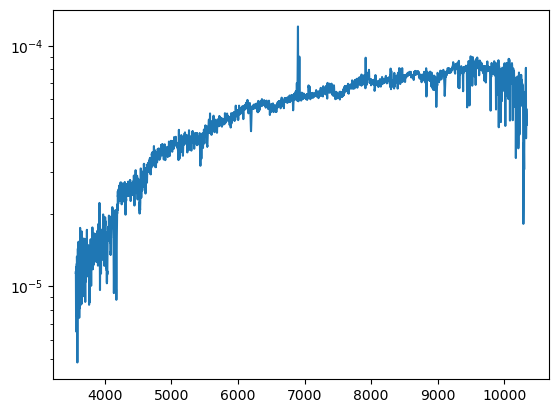

In [29]:
import matplotlib.pyplot as plt
wave = 10**t_spec['loglam']
flux = t_spec['flux'] * (10**(17-23))/3631
plt.plot(wave, flux*wave)
plt.yscale('log')